# California House Price Prediction

The data contains information from the 1990 California census.  The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows:

* longitude
* latitude
* housing_median_age -> years (capped at 52)
* total_rooms
* total_bedrooms
* population
* households
* median_income -> in $10,000s (this is capped at 15)
* median_house_value -> capped at $500,000
* ocean_proximity

## Acknowledgements

This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

In [13]:
import pandas as pd

In [14]:
dataset = pd.read_csv("housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [49]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
dataset.shape

(20640, 10)

In [17]:
from sklearn.model_selection import train_test_split

target = "median_house_value"
X = dataset.drop(columns=target, axis=1)
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [18]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [19]:
y_train.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR, SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [21]:
num_features = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"] 
num_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("median_imputer", SimpleImputer(strategy="median"))
])

In [22]:
cat_features = ["ocean_proximity"]
cat_pipeline = Pipeline([
    ("onehot", OneHotEncoder())
])

In [30]:
pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features),
])

X_train_t = pipeline.fit_transform(X_train, y_train)

In [31]:
linear_svm = LinearSVR(random_state=42)
linear_svm.fit(X_train_t, y_train)

LinearSVR(random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error
y_pred = linear_svm.predict(X_train_t)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE ($1000): {rmse}")

RMSE: 218440.6678043603


In [43]:
svm_reg = SVR()
svm_reg.fit(X_train_t, y_train)
y_pred = svm_reg.predict(X_train_t)
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE ($1000): {rmse}")

RMSE ($1000): 118406.21946397949


## Notes

Using all features and unoptimised Support Vector Regressors the RMSE is very high at ~ $100,000.  To improve use feature engineering, feature importance and hyperparameter optimisation.

## Feature Engineering

In [44]:
X_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>, <AxesSubplot:>]],
      dtype=object)

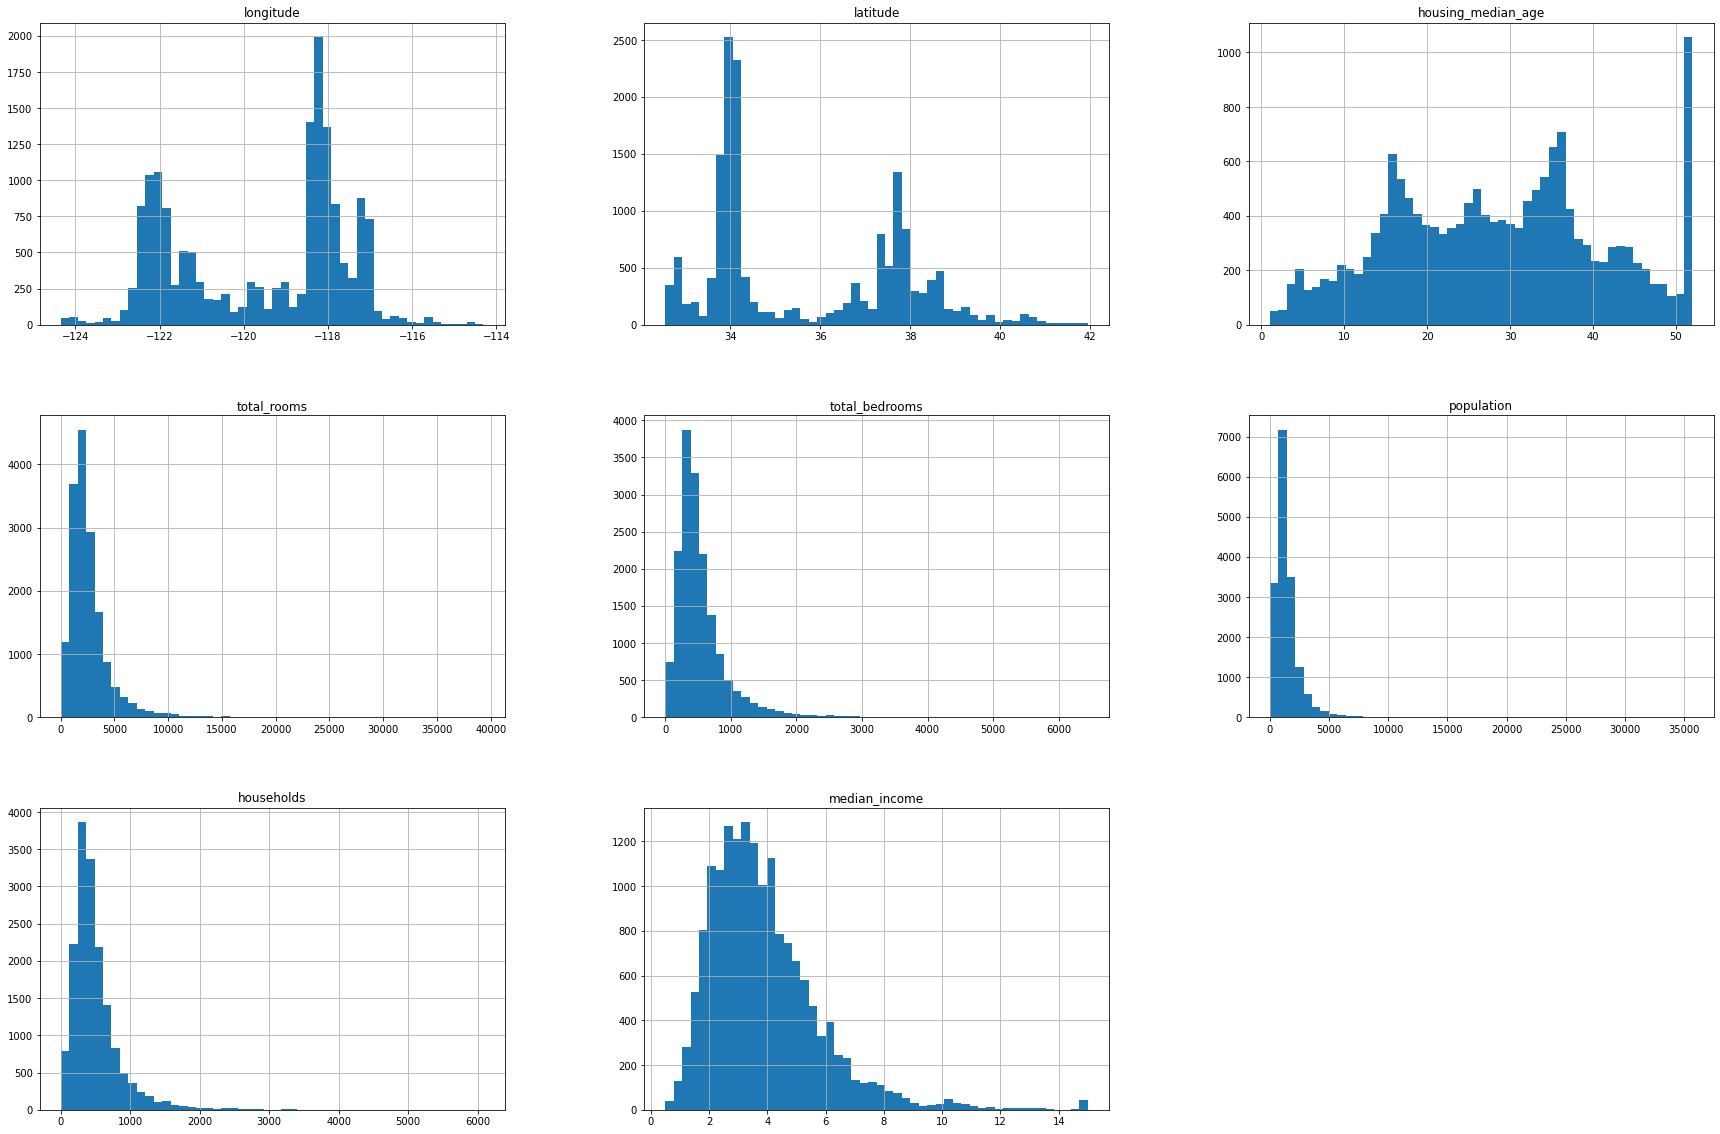

In [50]:
X_train.hist(bins=50, figsize=(30, 20))

The values median_income and housing_median_age are capped at 15 and 52 respectively.

In [51]:
X_train["housing_median_age"].max()

52.0

In [52]:
X_train["median_income"].max()

15.0001

In [80]:
X_train["rooms_per_house"] = X_train["total_rooms"] / X_train["households"]

In [81]:
X_train["rooms_per_house"] = X_train["total_rooms"] / X_train["households"]
X_train["bedrooms_per_room"] = X_train["total_bedrooms"] / X_train["total_rooms"]
X_train["pop_per_house"] = X_train["population"] / X_train["households"]

In [83]:
X_train["pop_per_house"] = X_train["population"] / X_train["households"]

## Test set generation

The dataset has strata within it, so make sure to generate a train and test sets which reflect these strata.

<AxesSubplot:>

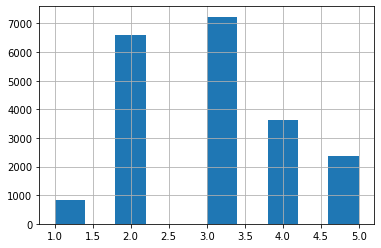

In [54]:
import numpy as np
dataset["income_cat"] = pd.cut(dataset["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1, 2, 3, 4, 5])
dataset["income_cat"].hist()

In [55]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset, dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [56]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [61]:
X = dataset.drop(columns=target, axis=1)
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [63]:
X_test["income_cat"].value_counts() / len(X_test)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

<AxesSubplot:>

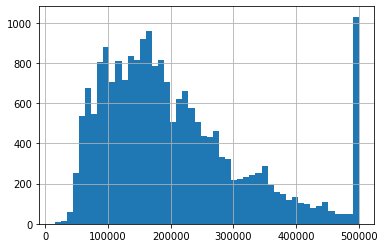

In [66]:
dataset[target].hist(bins=50)

In [69]:
dataset[dataset[target] == dataset[target].max()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY,1
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY,1
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0,NEAR BAY,5
494,-122.24,37.85,52.0,3726.0,474.0,1366.0,496.0,9.3959,500001.0,NEAR BAY,5
509,-122.23,37.83,52.0,2990.0,379.0,947.0,361.0,7.8772,500001.0,NEAR BAY,5
...,...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0,<1H OCEAN,4
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN,5
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN,5
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN,5


The target variable also has a cap in it at $500,000.

<AxesSubplot:>

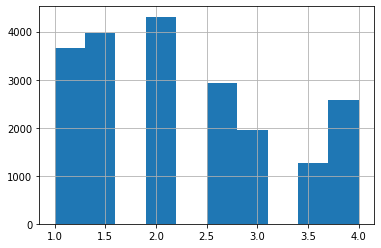

In [75]:
import numpy as np
dataset["house_val_cat"] = pd.cut(dataset["median_house_value"], bins=[0, 100000, 150000, 200000, 250000, 300000, 350000, np.inf], labels=[1, 1.5, 2, 2.5, 3, 3.5, 4])
dataset["house_val_cat"].hist()

In [103]:
dataset["rooms_per_house"] = dataset["total_rooms"] / dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"] / dataset["total_rooms"]
dataset["pop_per_house"] = dataset["population"] / dataset["households"]

In [104]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataset, dataset["house_val_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [105]:
strat_test_set["house_val_cat"].value_counts() / len(strat_test_set)

2.0    0.208818
1.5    0.191860
1.0    0.177326
2.5    0.141715
4.0    0.124758
3.0    0.094234
3.5    0.061289
Name: house_val_cat, dtype: float64

In [106]:
X = dataset.drop(columns=target, axis=1)
y = dataset[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [107]:
X_test["house_val_cat"].value_counts() / len(X_test)

2.0    0.219234
1.5    0.188227
1.0    0.179021
2.5    0.140988
4.0    0.122335
3.0    0.090601
3.5    0.059593
Name: house_val_cat, dtype: float64

<AxesSubplot:>

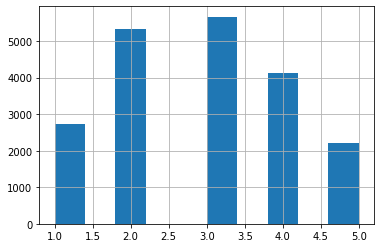

In [108]:
dataset["house_age_cat"] = pd.cut(dataset["housing_median_age"], bins=[5, 15, 25, 35, 45, np.inf], labels=[1, 2, 3, 4, 5])
dataset["house_age_cat"].hist()

## Correlation checking

In [109]:
strat_data = strat_train_set.copy()

In [110]:
corr_matrix = strat_data.corr()

In [119]:
corr_matrix["median_house_value"].sort_values(ascending=False, key=np.abs)

median_house_value    1.000000
median_income         0.689112
bedrooms_per_room    -0.256115
rooms_per_house       0.147873
latitude             -0.143223
total_rooms           0.132568
housing_median_age    0.104869
households            0.065981
total_bedrooms        0.050154
longitude            -0.044832
population           -0.023743
pop_per_house        -0.022083
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='rooms_per_house', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='pop_per_house', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='rooms_per_house', ylabel='median_income'>,
        <AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_income'>,
        <AxesSubplot:xlabe

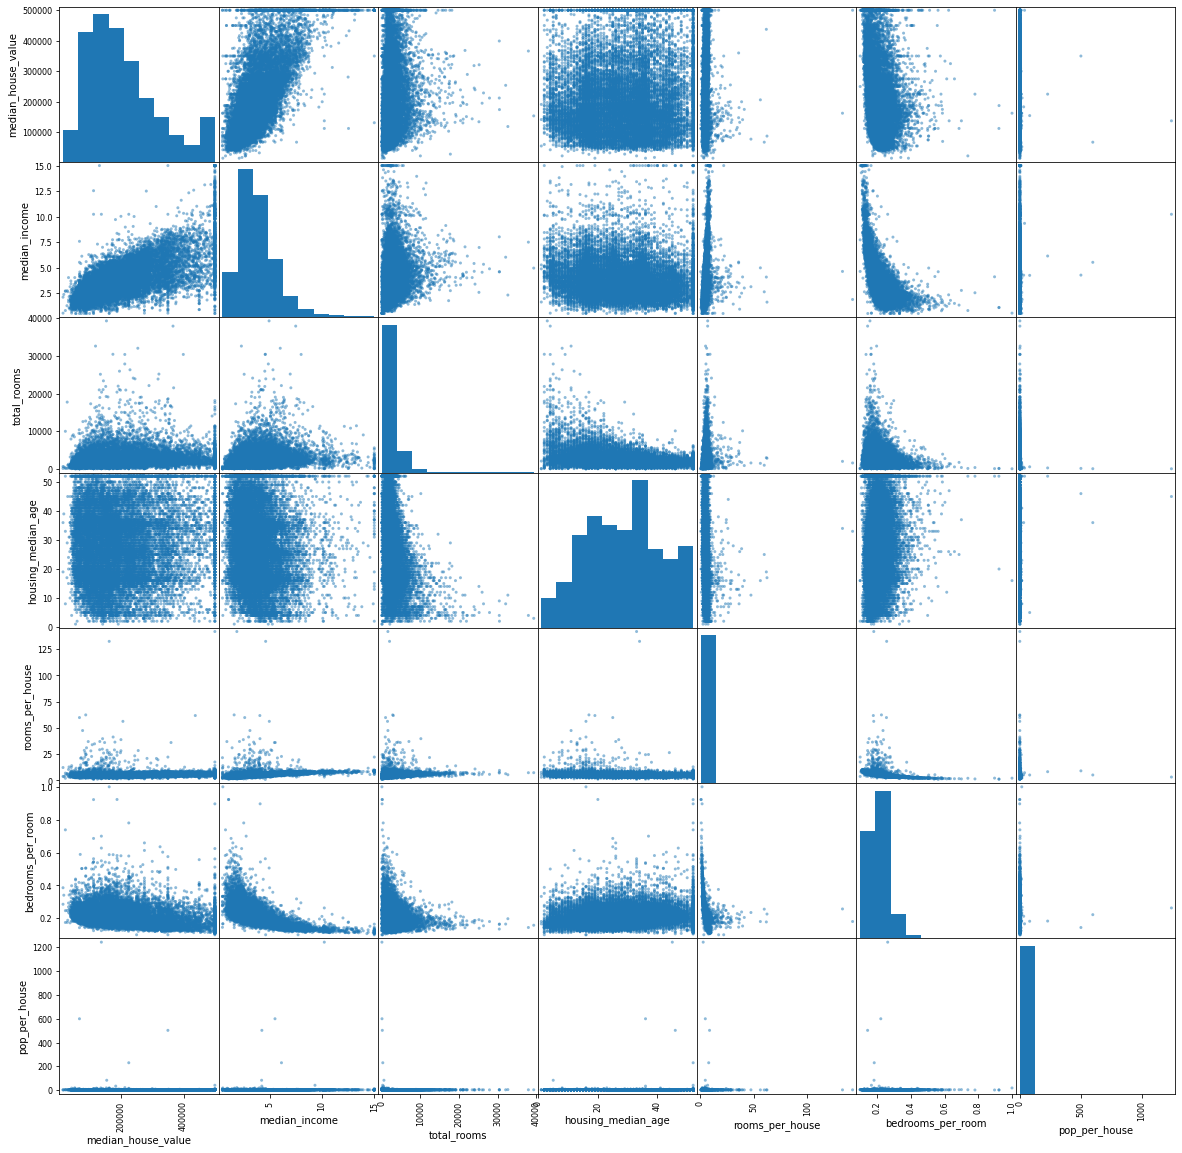

In [114]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "rooms_per_house", "bedrooms_per_room", "pop_per_house"]
scatter_matrix(strat_data[attributes], figsize=(20, 20))